# Table widgets in the napari viewer
Before we talk about tables and widgets in napari, let's create a viewer, a simple test image and a labels layer:

In [1]:
import numpy as np
import napari
import pandas
from napari_skimage_regionprops import regionprops, add_table, get_table

In [2]:
viewer = napari.Viewer()

If you want to compute separable approximations, please install it with
pip install scikit-tensor-py3


In [3]:
viewer.add_image(np.asarray([[1,2],[2,2]]))
viewer.add_labels(np.asarray([[1,2],[3,3]]))

<Labels layer 'Labels' at 0x19a9c3c8850>

Now, let's perform a measurement of `size` and `intensity` of the labeled objects in the given image. A table with results will be automatically added to the viewer

In [4]:
regionprops(
    viewer.layers[0],
    viewer.layers[1],
    viewer,
    size=True,
    intensity=True
)

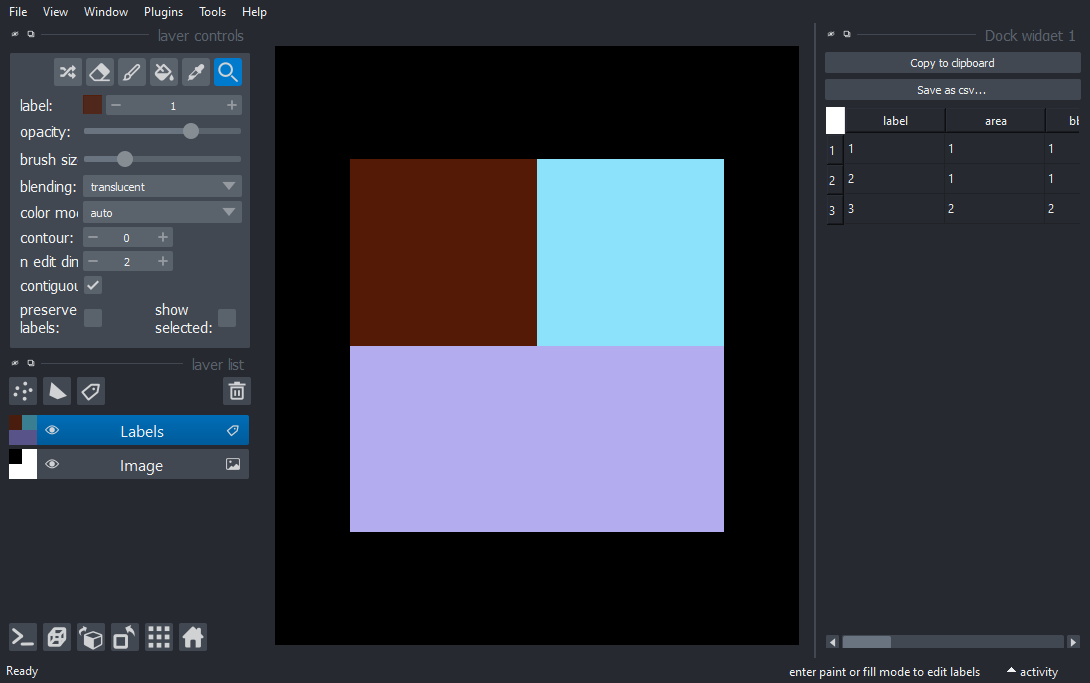

In [5]:
napari.utils.nbscreenshot(viewer)

We can also get the widget representing the table:

In [6]:
# The table is associated with a given labels layer:
labels = viewer.layers[1]

table = get_table(labels, viewer)
table

You can also read the content from the table as a dictionary. It is recommended to convert it into a pandas `DataFrame`:

In [7]:
pandas.DataFrame(table.get_content())

,label,area,bbox_area,convex_area,equivalent_diameter,max_intensity,mean_intensity,min_intensity,standard_deviation_intensity
0,1,1,1,1,1.128379,1,1.0,1,0.0
1,2,1,1,1,1.128379,2,2.0,2,0.0
2,3,2,2,2,1.595769,2,2.0,2,0.0


The content of this table can be changed programmatically. This also changes the `properties` of the associated layer.

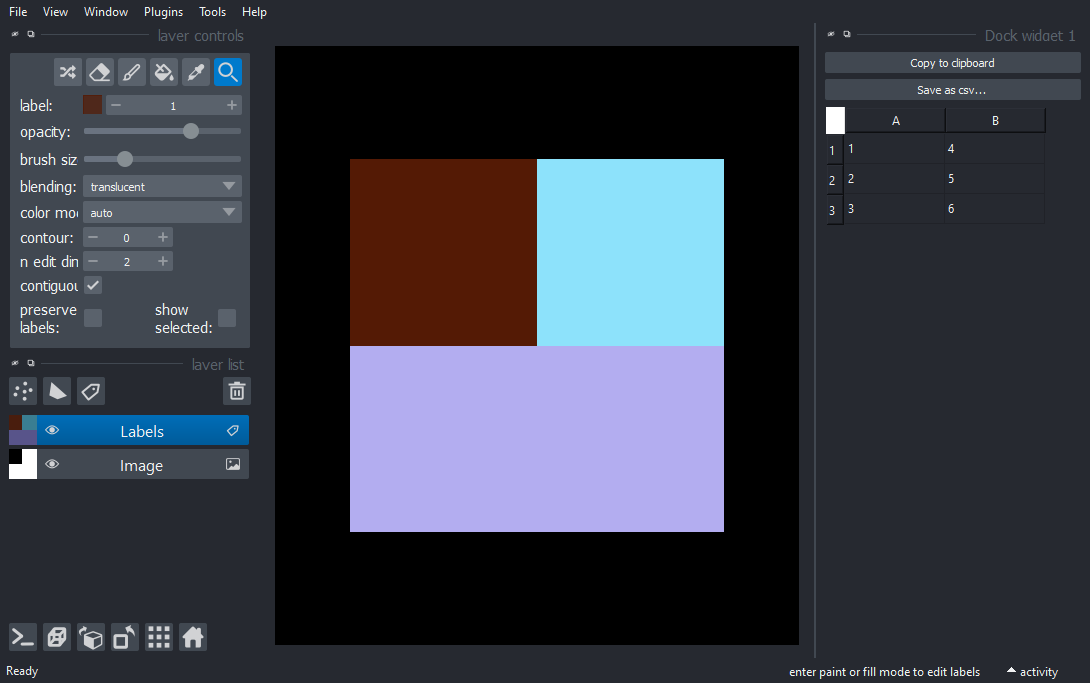

In [8]:
new_values = {'A': [1, 2, 3],
             'B': [4, 5, 6]
             }
table.set_content(new_values)
napari.utils.nbscreenshot(viewer)

Note: Changing the label's `properties` does not invoke changes of the table...

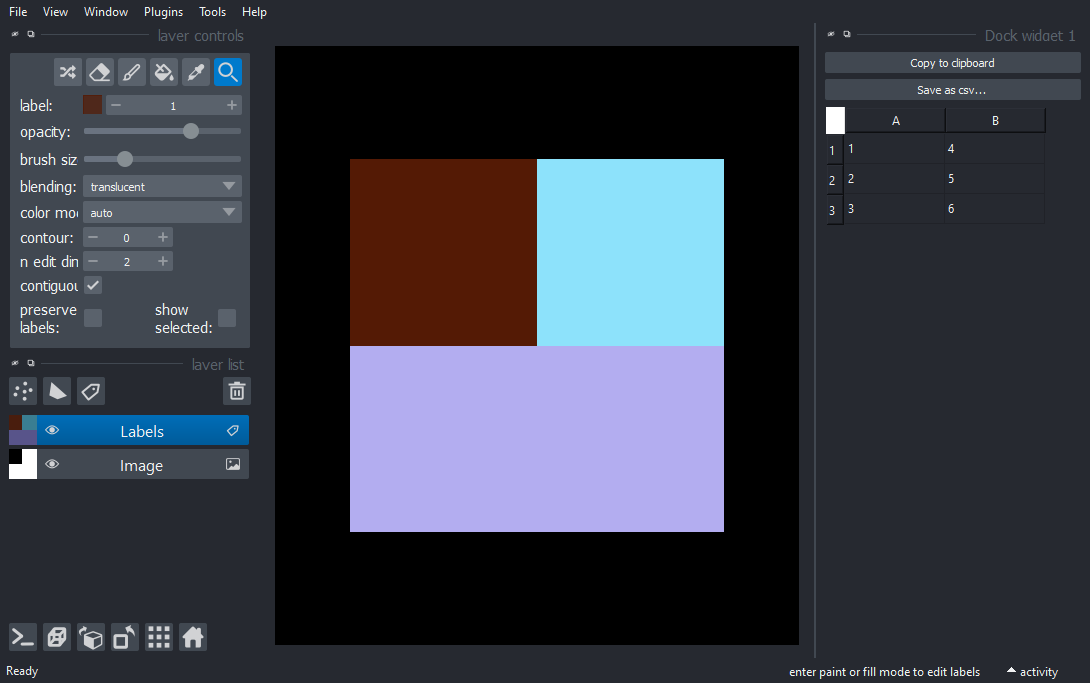

In [9]:
new_values = {'C': [6, 7, 8],
             'D': [9, 10, 11]
             }

labels.properties = new_values
napari.utils.nbscreenshot(viewer)

But you can refresh the content:

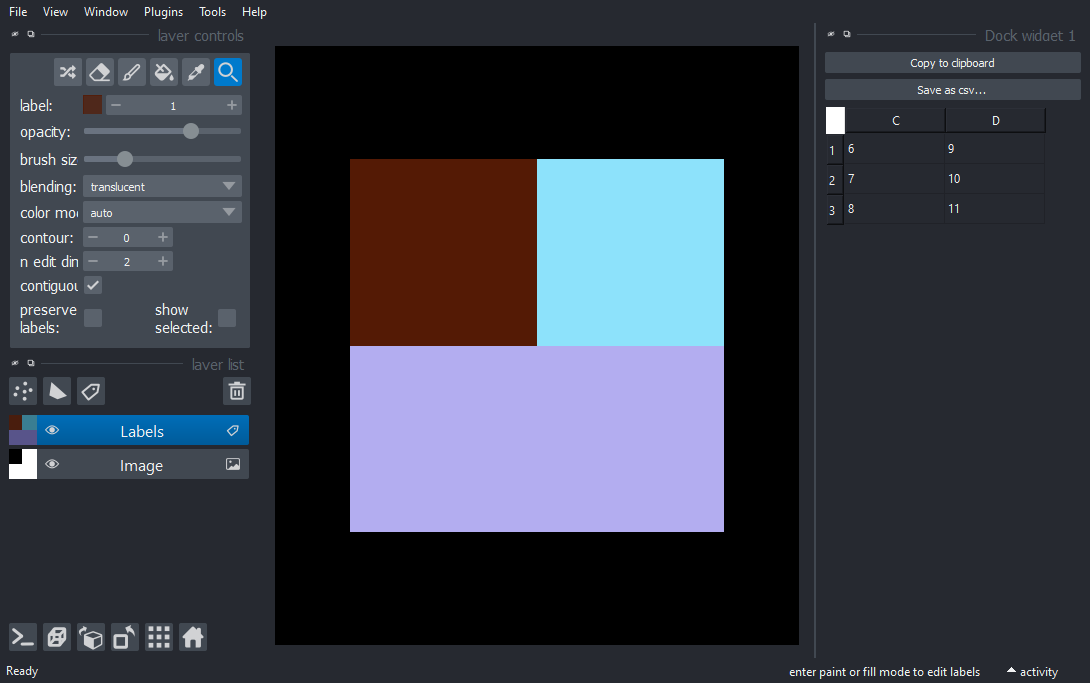

In [10]:
table.update_content()
napari.utils.nbscreenshot(viewer)

You can remove the table from the viewer like this:

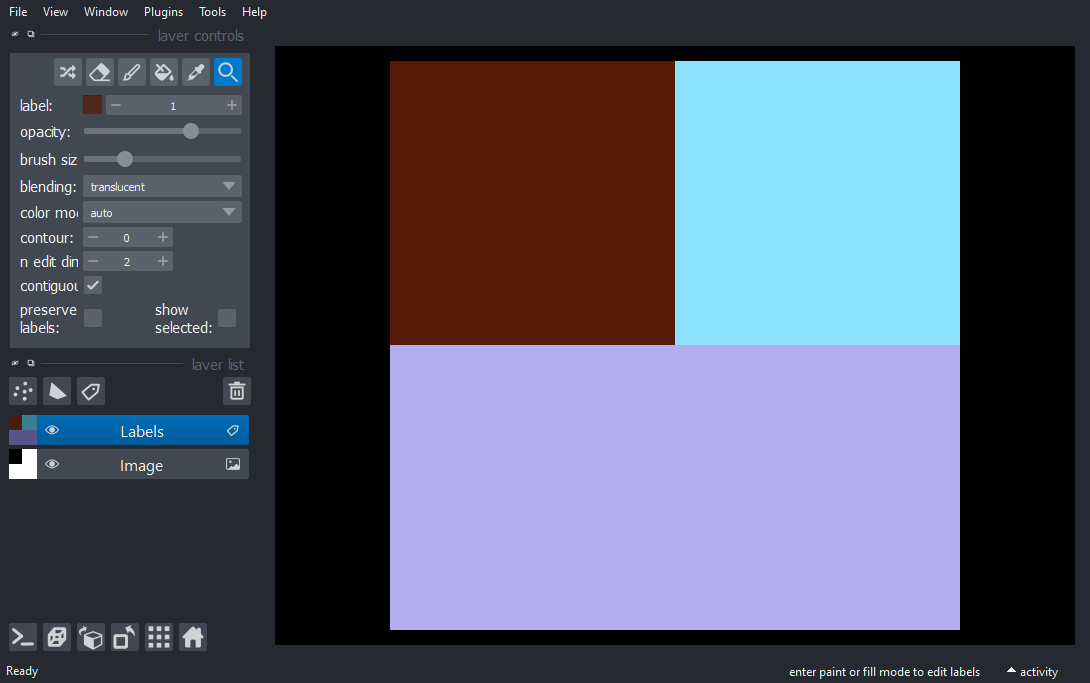

In [11]:
viewer.window.remove_dock_widget(table)
napari.utils.nbscreenshot(viewer)

Afterwards, the `get_table` method will return None:

In [12]:
get_table(labels, viewer)

To add the table again, just call `add_table` again. Note that the content of the properties of the labels have not been changed.

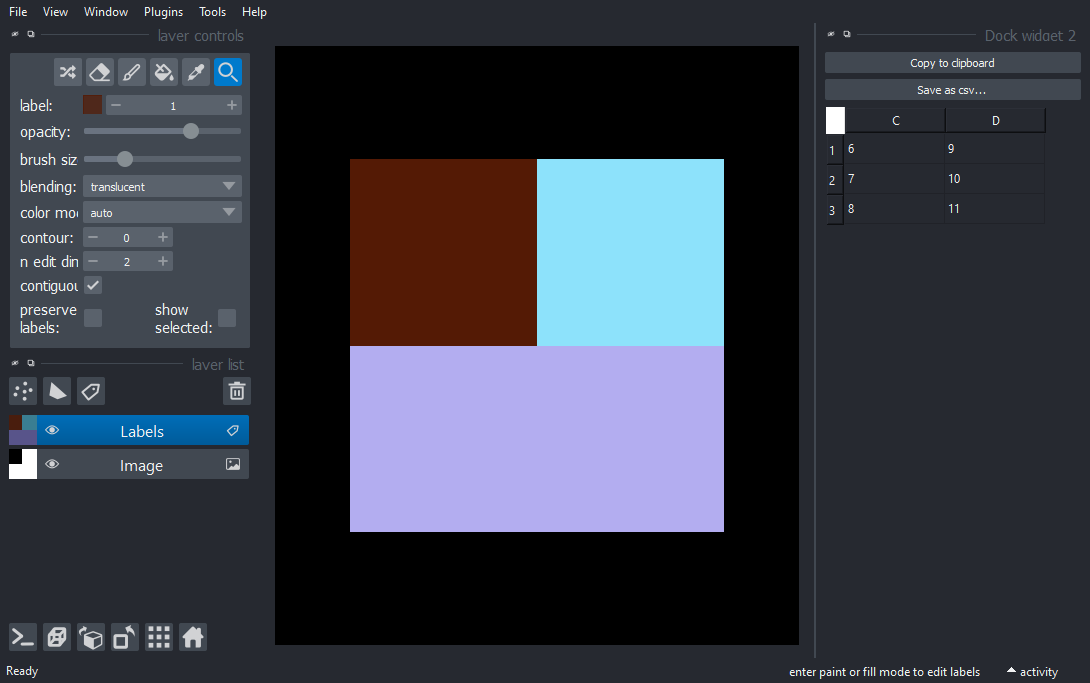

In [13]:
add_table(labels, viewer)
napari.utils.nbscreenshot(viewer)